In [8]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver=webdriver.Chrome("C:/Users/pc/chromedriver/chromedriver_win32/chromedriver.exe")
driver.get("https://youtube-rank.com/board/bbs/board.php?bo_table=youtube")

html=driver.page_source

In [9]:
soup=BeautifulSoup(html, "html.parser")

In [13]:
channel_list=soup.select("table>tbody>tr")

In [23]:
#채널 이름
channel_name=channel_list[0].select("a")[1]

In [27]:
channel_name.text.strip()

'BLACKPINK'

In [28]:
#카테고리 정보
channel_list

[<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
 <td class="rank">
                         1                    </td>
 <td class="td_img">
 <div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="/img/img_bg.png" width="88"/></a></div>
 <p class="info_rank">1</p>
 </td>
 <td class="subject">
 <h1>
 <p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                 
                                 </p>
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
 								
 								BLACKPINK							</a>
 <span>
 <i class="fa fa-comment"></i>
 								1							</span>
 <i aria-hidden="true" c

In [59]:
channel_category=channel_list[0].select("p.category")[0].text.strip()
channel_category

'[음악/댄스/가수]'

In [53]:
#구독자 순, view순, 동영상 수
subscriber_cnt=channel_list[0].select("td.subscriber_cnt")[0].text
view_cnt=channel_list[0].select("td.view_cnt")[0].text
video_cnt=channel_list[0].select("td.video_cnt")[0].text

In [60]:
for i in range(20):
    channel_name=channel_list[i].select("a")[1].text.strip()
    channel_category=channel_list[0].select("p.category")[0].text.strip()
    subscriber_cnt=channel_list[i].select("td.subscriber_cnt")[0].text
    view_cnt=channel_list[i].select("td.view_cnt")[0].text
    video_cnt=channel_list[i].select("td.video_cnt")[0].text
    print(f'{channel_name}, {channel_category},{subscriber_cnt},{view_cnt},{video_cnt}')

BLACKPINK, [음악/댄스/가수],6370만,188억2859만,370개
HYBE LABELS, [음악/댄스/가수],6010만,184억9465만,641개
BANGTANTV, [음악/댄스/가수],5580만,119억5740만,1,574개
SMTOWN, [음악/댄스/가수],2840만,217억4918만,3,721개
Boram Tube Vlog [보람튜브 브이로그], [음악/댄스/가수],2650만,110억5288만,223개
1MILLION Dance Studio, [음악/댄스/가수],2410만,66억7152만,2,850개
1theK (원더케이), [음악/댄스/가수],2320만,204억8632만,14,902개
JYP Entertainment, [음악/댄스/가수],2150만,136억2741만,1,317개
Coldplay, [음악/댄스/가수],1920만,127억1646만,278개
Mnet K-POP, [음악/댄스/가수],1830만,127억8995만,25,100개
JFlaMusic, [음악/댄스/가수],1720만,34억1166만,279개
KBS WORLD TV, [음악/댄스/가수],1660만,122억9387만,52,245개
officialpsy, [음악/댄스/가수],1500만,86억0146만,90개
Jane ASMR 제인, [음악/댄스/가수],1410만,48억5754만,1,177개
BIGBANG, [음악/댄스/가수],1370만,66억5928만,773개
TWICE, [음악/댄스/가수],1140만,21억6689만,588개
Nao FunFun, [음악/댄스/가수],1080만,377만,34개
Stone Music Entertainment, [음악/댄스/가수],996만,78억1641만,7,863개
DuDuPopTOY, [음악/댄스/가수],982만,43억5626만,1,723개
Hongyu ASMR 홍유, [음악/댄스/가수],970만,26억5997만,380개


## 페이지 11page까지의 크롤링하기

In [62]:
page=1
url="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}".format(page)
url

'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1'

In [68]:
import time
result=[]
time.sleep(2)
for page in range(1,11):
    url="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}".format(page)
    driver.get(url)
    html=driver.page_source
    soup=BeautifulSoup(html,"html.parser")
    channel_list=soup.select("table>tbody>tr")
    for i in range(100):
        channel_name=channel_list[i].select("a")[1].text.strip()
        channel_category=channel_list[0].select("p.category")[0].text.strip()
        subscriber_cnt=channel_list[i].select("td.subscriber_cnt")[0].text
        view_cnt=channel_list[i].select("td.view_cnt")[0].text
        video_cnt=channel_list[i].select("td.video_cnt")[0].text
        data = [channel_name,channel_category, subscriber_cnt,view_cnt,video_cnt ]
        result.append(data)

In [74]:
import pandas as pd
df=pd.DataFrame(result)
df.columns=["title","category","subscriber","view","video"]
df.to_excel("C:/Users/pc/Main/Data_python/youtube.xlsx", index = False)

## 랭킹데이터 시각화하기

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_excel("C:/Users/pc/Main/Data_python/youtube.xlsx")
data.head(10)

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],6370만,188억2859만,370개
1,HYBE LABELS,[음악/댄스/가수],6010만,184억9465만,641개
2,BANGTANTV,[음악/댄스/가수],5580만,119억5740만,"1,574개"
3,SMTOWN,[음악/댄스/가수],2840만,217억4918만,"3,721개"
4,Boram Tube Vlog [보람튜브 브이로그],[음악/댄스/가수],2650만,110억5288만,223개
5,1MILLION Dance Studio,[음악/댄스/가수],2410만,66억7152만,"2,850개"
6,1theK (원더케이),[음악/댄스/가수],2320만,204억8632만,"14,902개"
7,JYP Entertainment,[음악/댄스/가수],2150만,136억2741만,"1,317개"
8,Coldplay,[음악/댄스/가수],1920만,127억1646만,278개
9,Mnet K-POP,[음악/댄스/가수],1830만,127억8995만,"25,100개"


In [83]:
##한글을 표시하기 위해 글꼴 설정
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

In [84]:
data.tail()

,title,category,subscriber,view,video
995,임선비,[음악/댄스/가수],51만,2억2977만,"1,122개"
996,두치와뿌꾸,[음악/댄스/가수],51만,7억6902만,"9,822개"
997,희철리즘Heechulism,[음악/댄스/가수],51만,1억3267만,248개
998,ROAD FIGHTING CHAMPIONSHIP,[음악/댄스/가수],51만,4억4649만,"4,030개"
999,시니어전성시대,[음악/댄스/가수],50만,5721만,139개


In [85]:
data['subscriber'][:10] #슬라이싱

0    6370만
1    6010만
2    5580만
3    2840만
4    2650만
5    2410만
6    2320만
7    2150만
8    1920만
9    1830만
Name: subscriber, dtype: object

## 데이터 타입 변형하기 astype('int')

In [91]:
data["subscriber_replace"]=data['subscriber'].str.replace("만",'0000')
data.head()

,title,category,subscriber,view,video,subscriber_replace
0,BLACKPINK,[음악/댄스/가수],6370만,188억2859만,370개,63700000
1,HYBE LABELS,[음악/댄스/가수],6010만,184억9465만,641개,60100000
2,BANGTANTV,[음악/댄스/가수],5580만,119억5740만,"1,574개",55800000
3,SMTOWN,[음악/댄스/가수],2840만,217억4918만,"3,721개",28400000
4,Boram Tube Vlog [보람튜브 브이로그],[음악/댄스/가수],2650만,110억5288만,223개,26500000


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               1000 non-null   object
 1   category            1000 non-null   object
 2   subscriber          1000 non-null   object
 3   view                1000 non-null   object
 4   video               1000 non-null   object
 5   subscriber_replace  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [99]:
data["subscriber_replace"]=data["subscriber_replace"].astype("int") #데이터 타입 변형하기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               1000 non-null   object
 1   category            1000 non-null   object
 2   subscriber          1000 non-null   object
 3   view                1000 non-null   object
 4   video               1000 non-null   object
 5   subscriber_replace  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [104]:
## 카테고리별(기준) 구독자 수 피벗 테이블 생성하기
pivot_table=data.pivot_table(index='category', values="subscriber_replace", aggfunc=["sum","count"])
pivot_table

,sum,count
,subscriber_replace,subscriber_replace
category,,
[BJ/인물/연예인],268270000,100
[TV/방송],168610000,100
[게임],59240000,100
[뉴스/정치/사회],86450000,100
[영화/만화/애니],127990000,100
[음악/댄스/가수],1123870000,400
[키즈/어린이],104520000,100


In [105]:
pivot_table.columns=["subscriber_sum","subscriber_count"]
pivot_table

,subscriber_sum,subscriber_count
category,,
[BJ/인물/연예인],268270000,100
[TV/방송],168610000,100
[게임],59240000,100
[뉴스/정치/사회],86450000,100
[영화/만화/애니],127990000,100
[음악/댄스/가수],1123870000,400
[키즈/어린이],104520000,100


In [106]:
pivot_table=pivot_table.reset_index()
pivot_table

,category,subscriber_sum,subscriber_count
0,[BJ/인물/연예인],268270000,100
1,[TV/방송],168610000,100
2,[게임],59240000,100
3,[뉴스/정치/사회],86450000,100
4,[영화/만화/애니],127990000,100
5,[음악/댄스/가수],1123870000,400
6,[키즈/어린이],104520000,100


In [107]:
pivot_table=pivot_table.sort_values(by="subscriber_sum", ascending=False) #내림차순으로 정렬하기
pivot_table

,category,subscriber_sum,subscriber_count
5,[음악/댄스/가수],1123870000,400
0,[BJ/인물/연예인],268270000,100
1,[TV/방송],168610000,100
4,[영화/만화/애니],127990000,100
6,[키즈/어린이],104520000,100
3,[뉴스/정치/사회],86450000,100
2,[게임],59240000,100


## 카테고리별 구독자 수 시각화하기

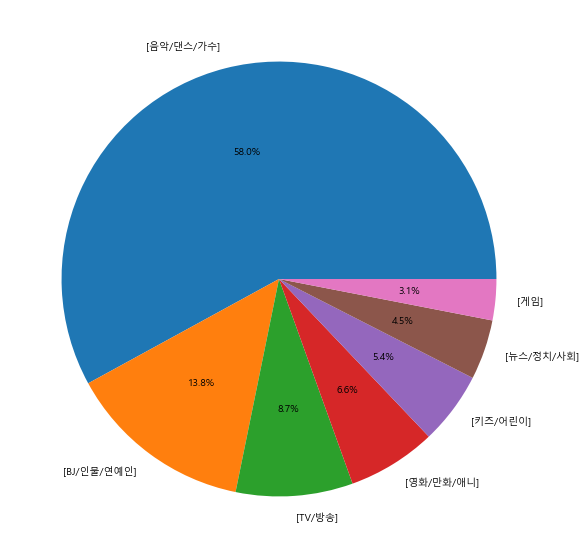

In [108]:
plt.figure(figsize=(30,10))
plt.pie(pivot_table["subscriber_sum"],labels=pivot_table["category"],autopct="%1.1f%%")
plt.show()